#  Analysing the effects of PSO parameters on fitness

In [2]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def get_config(file='config.json'):
    with open(file) as cfg_file:  
     return json.load(cfg_file)

def get_all_config_results(cfg, filepath):
    # A bit messy. Creates a table of resulted fitness for each algorithm configuration on each month
    with open(filepath) as cfg_file:  
     all_cfg = json.load(cfg_file)
    df = pd.DataFrame(columns=['config name','data file','mdd', 'no_of_short_selling_transactions', 'no_of_transactions', 'noop', 'realised_profit', 'ret', 'u_buy', 'u_sell', 'value', 'wealth'])
    for config in all_cfg:
        for f in cfg['data']['files']:
            fp = all_cfg[config]['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
            p = pd.Series(pickle.load(open(fp,"rb")), name=(config+' '+f))
            p['config name'] = config
            p['data file'] = f
            df = df.append(p)
    return df

def get_configurations(data, names):
    """
        Returns df on each test month with all configs of the names array
    """
    df = pd.concat(data.loc[data['config name'] == n] for n in names)
    return df.loc[df['data file'] == 'data/fx-spot_EUR_GBP_10min_201306.txt:fx-spot_EUR_GBP_10min_201306:02:20:21:28'][['config name', 'value']].set_index('config name'), df.loc[df['data file'] == 'data/fx-spot_EUR_GBP_10min_201307.txt:fx-spot_EUR_GBP_10min_201307:0:20:21:30'][['config name', 'value']].set_index('config name'), df.loc[df['data file'] == 'data/fx-spot_EUR_GBP_10min_201308.txt:fx-spot_EUR_GBP_10min_201308:0:20:21:29'][['config name', 'value']].set_index('config name')

def plot_train_months(june, july, august):
    plt.plot(june)
    plt.plot(july)
    plt.plot(august)
    plt.legend(['june', 'july', 'august'])
    plt.xticks(rotation=20)
    plt.xlabel('Configurations', size=14)
    plt.ylabel('Fitness value', size=14)


In [5]:
# Load data
cfg = get_config()
all_configs = get_all_config_results(cfg, './config/algos/csfla_param_exp_configs.json')

## Total number of frogs 
The number of frogs is similar to the swarm size in the pso. 
I hypothesise that the higher the n_frogs, the more initial exploration is possible, so the better the results. However, it also increase computation as its not O(n) (explain)

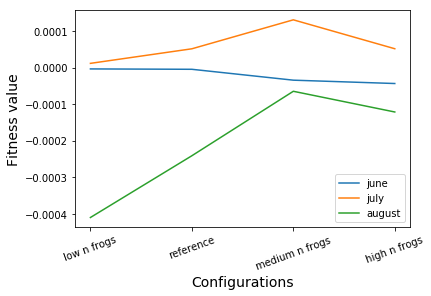

In [15]:
p_configs = ['low n frogs', 'reference', 'medium n frogs', 'high n frogs']
june, july, august = get_configurations(all_configs, p_configs)
plot_train_months(june, july, august)

## Number of memeplexes
The more memeplexes we have, the more optimimums are explored

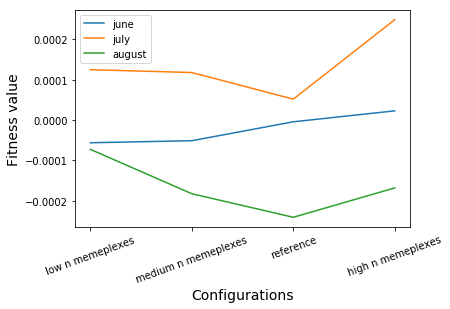

In [18]:
p_configs = ['low n memeplexes',  'medium n memeplexes', 'reference', 'high n memeplexes']
june, july, august = get_configurations(all_configs, p_configs)
plot_train_months(june, july, august)

## Number of frogs selected for sub-memeplex
The more frogs selected for a sub-memeplex, the lower the fitness of the lowest selected frog, and the higher the fitness of the best selected frog.

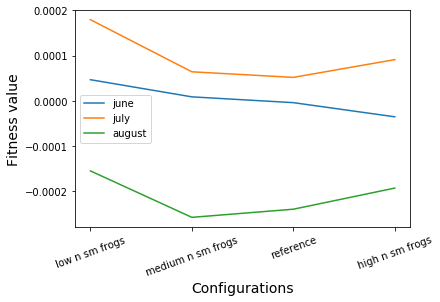

In [19]:
p_configs = ['low n sm frogs',  'medium n sm frogs', 'reference', 'high n sm frogs']
june, july, august = get_configurations(all_configs, p_configs)
plot_train_months(june, july, august)

## Number of generations
The higher the number of generations, the higher the global fitness, because we allow frogs to evolve more

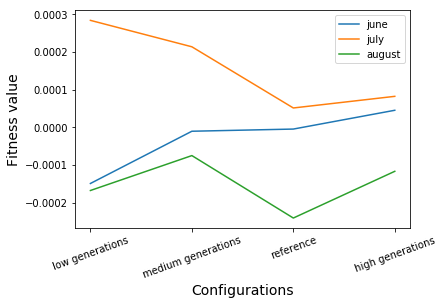

In [20]:
p_configs = ['low generations', 'medium generations', 'reference', 'high generations']
june, july, august = get_configurations(all_configs, p_configs)
plot_train_months(june, july, august)

## Number of sub-memeplex generations
The higher the number of s-m generations, the more niched the frogs become, the more we allow niches to be exploited.

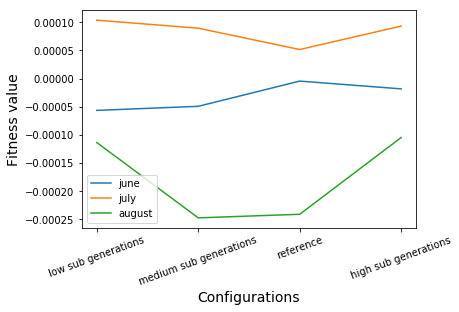

In [21]:
p_configs = ['low sub generations', 'medium sub generations', 'reference', 'high sub generations']
june, july, august = get_configurations(all_configs, p_configs)
plot_train_months(june, july, august)

## Conclusion of independent param examination

These results are similar to what was given with pso: generally speaking, parameters perform well when on extreme values, which is when they favor either exploration/generality or exploitation. 

I thus follow a similar strategy than with PSO and elaborate 5 strategies:


# Proposed combinatorial setups

I time each setup since we now take into account expensiveness of computation

## Reference
Stays the same

## Extreme Niching cheap
Niching params: high n memeplexes, high n frogs per sub-memeplexes, high n sub memeplex generations

Cost params: small n frogs, small n generations

## Extreme Niching expensive
Niching params: high n memeplexes, high n frogs per sub-memeplexes, high n sub memeplex generations

Cost params: high n frogs, high n generations


## Global cheap
Niching params: low n memeplexes, low n frogs per sub-memeplexes, low n sub memeplex generations

Cost params: small n frogs, small n generations



## Global expensive
Niching params: low n memeplexes, low n frogs per sub-memeplexes, low n sub memeplex generations

Cost params: high n frogs, high n generations


# RESULTS

In [6]:
# Load and group results
test_configs = get_all_config_results(cfg, './config/algos/csfla_configs.json')
p_configs = ['reference', 'extreme niching cheap', 'extreme niching expensive', 'global cheap',  'global expensive']
june, july, august = get_configurations(test_configs, p_configs)
june['month'] = 'june'
july['month'] = 'july'
august['month'] = 'august'
fitnesses = june.append(july.append(august))
print(fitnesses)

                              value   month
config name                                
reference                 -0.000148    june
extreme niching cheap      0.000029    june
extreme niching expensive -0.000042    june
global cheap              -0.000057    june
global expensive          -0.000055    june
reference                  0.000052    july
extreme niching cheap      0.000314    july
extreme niching expensive  0.000277    july
global cheap               0.000206    july
global expensive           0.000048    july
reference                 -0.000054  august
extreme niching cheap     -0.000063  august
extreme niching expensive -0.000167  august
global cheap              -0.000307  august
global expensive          -0.000264  august


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

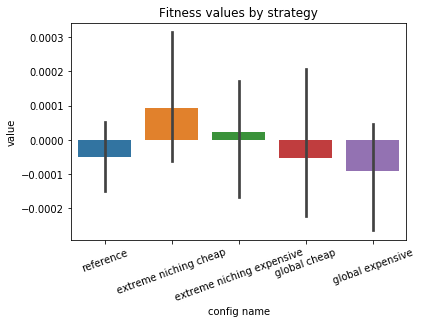

In [7]:
df = fitnesses.reset_index()

p = sns.barplot(x='config name', y='value', data=df).set_title('Fitness values by strategy')
plt.xticks(rotation=20)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

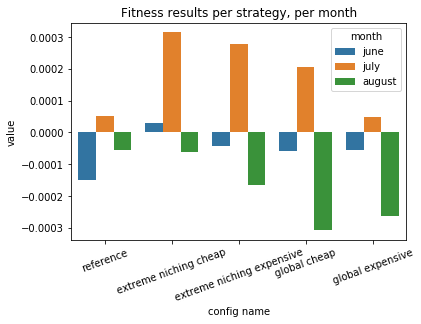

In [8]:
p = sns.barplot(x='config name', y='value', data=df, hue='month').set_title('Fitness results per strategy, per month')
plt.xticks(rotation=20)

## Interpretation
Global is rubbish. Niching seem to perform very well compared to other configurations, but not extremely well compared to PSO.
